<a href="https://colab.research.google.com/github/hakidaova/MLF/blob/main/MLF_cv4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MPA-MLF, Lab 2 - Clustering and K-means
What is Clustering?
Clustering is an unsupervised machine learning technique used to group similar data points together. The goal of clustering is to find hidden patterns or structures in the data without requiring predefined labels. It is widely used in various applications such as customer segmentation, image compression, anomaly detection, and document classification.

K-means
K-means is one of the most popular unsupervised machine learning and clustering algorithms and is well known for its simplicity. This algorithm aims to separate unlabeled data into different clusters(subgroups) with the number of clusters represented by the variable K. Data points in the same cluster are very similar, while data points in different clusters are very different. The similarity of data is based on some similarity metric, where the similarity metric can be distance-based, correlation-based, etc.

Advantages:

Simple and fast for large datasets
Works well with well-separated clusters
Challenges:

Requires specifying K in advance
Sensitive to initial centroid selection
Assumes spherical clusters (does not work well for non-convex shapes)
In our case, we will use distance-based metrics. Any distance-based metrics for numeric variables can be employed, for example:

Euclidean distance
Manhattan distance
Cosine similarity
There is an example how K-means works:

Imagine you have a bunch of dots scattered on a piece of paper. These dots represent data points, and the goal of the k-means algorithm is to group similar dots into clusters

To start, you randomly select k dots from the scatter plot and assign each one to be the centre of a cluster. These k dots are called centroids.

Then, you calculate the distance between each dot and each centroid and assign each dot to the closest centroid, effectively grouping the dots into k clusters.

Next, you recalculate the centroid of each cluster by finding the average position of all the dots in that cluster.

Repeat steps 3 and 4 until the centroids no longer change, meaning the clusters have stabilized.

Finally, the algorithm outputs the k clusters and the corresponding centroids.

In our case, we would use a Euclidian distance as a metric. Mathematically speaking, the goal would be to minimalize the following objective function:

image.png

Where:

k represents the number of clusters (groups)
m represents the number of points
u_k represents centroids
x_i represents data point
w_ik represents weight where wik=1 for data point xi if it belongs to cluster k; otherwise, wik=0.
There are some typical applications of using k-means:

Customer Segmentation: k-means can segment customers based on their demographic information or purchase behavior. This information can then be used for targeted marketing or to improve the customer experience.

Image Compression: k-means can reduce the number of colors in an image while preserving its visual quality. This is done by replacing similar color pixels with a single color, thereby reducing the amount of data required to represent the image.

Anomaly Detection: k-means can be used to identify outliers or anomalies in a dataset by clustering similar data points and identifying data points far from the centroids of their respective clusters.

Document Clustering: k-means can cluster documents based on their content, for example, to group news articles by topic or categorize customer support tickets.

Market Segmentation: k-means can be used to segment a market based on customer characteristics, such as age, income, or spending habits, in order to identify subgroups of customers with similar needs or preferences.

Recomended sources:

https://towardsdatascience.com/log-book-guide-to-distance-measuring-approaches-for-k-means-clustering-f137807e8e21
https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
https://realpython.com/k-means-clustering-python/
https://medium.com/@rishit.dagli/build-k-means-from-scratch-in-python-e46bf68aa875
https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
Exercise 1 - K-means from scratch
Implementing K-means
In this exercise, the task would be to implement a simple k-means algorithm from scratch, as described above. Let's rewrite the steps to be more readily implementable

Steps:

Specify the number of clusters K
initialize centroids
calculate the distance from centroids to all points in datasets
assign data points to the closest centroids
calculate objective function
compute new centroids to the clusters by taking the average of all data points that belong to each cluster
repeat steps 2-6. until there is no change in objective function or until the maximum n of iterations is reached
Tips:

Avoid using loops; if it is unnecessary, instead of using loops, use NumPy functions. There is a list of NumPy functions that you might find helpful:

np.argmin()
np.where()
np.transpose()
np.random.permutation()
np.random.schuffle()
np.linalg.norm()
np.arange()
np.split()
np.random.choice()
Since the initial clusters are selected randomly, the algorithm can lead to different results each time it runs. Running the algorithm multiple times and determining the result with the lowest objective function helps obtain the best results.

Code
Please note that the code structure provided below is only a recommendation. If you prefer, you can use your code structure. If you are familiar with OOP, you can also use it. However, writing your code in one function or not using functions at all is not the recommended approach

In [1]:
import matplotlib.pyplot as plt
import copy
import numpy as np
from numpy.linalg import norm
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


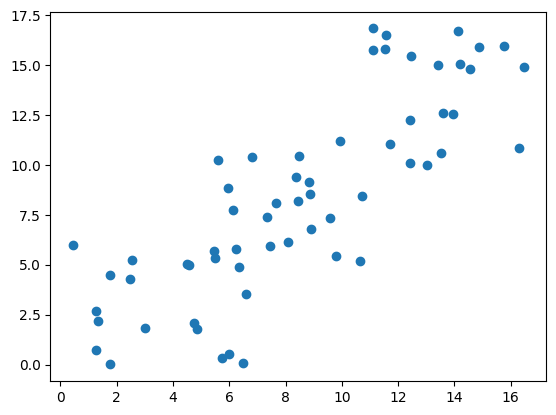

In [3]:
#0. Load dataset
#Use the following code to load data

loaded_points = np.load('/content/drive/MyDrive/Data/k_mean_points.npy')

plt.figure()
plt.scatter(loaded_points[:,0],loaded_points[:,1])

In [4]:
# 1. Specify number of clusters K
k = 3

In [5]:
# 2. initialize centroids

# There are more techniques, on how to change initial centroids.
# In our case, we will take all available points and shuffle them randomly,
# then we will choose first k_clusters points as initial centroids.

def initialize_clusters(points: np.ndarray, k_clusters: int) -> np.ndarray:
    """
    Initializes and returns k random centroids from the given dataset.

    :param points: Array of data points.
    :type: points ndarray with shape (n, 2)

    :param k_clusters: The number of clusters to form
    :type k_clusters: int


    :return: initial_clusters
    initial_clusters: Array of initialized centroids

    :rtype:
    initial_clusters: np.array (k_clusters, 2)
    :

    """

    ###################################
    # Write your own code here

    #points = np.random.shuffle(loaded_points)
    initial_clusters = points[np.random.choice(points.shape[0], k_clusters, replace = False)]

    ###################################

    return initial_clusters

In [6]:
ini = initialize_clusters(loaded_points,k) # initialized clusters with random centroids
print(ini)

[[3.00786776 1.8599373 ]
 [7.66355388 8.09644192]
 [7.43786942 5.92059597]]


In [7]:
# 3. Calculate distance from centroids to all points in datasets

# 3.1 Fistly, create a function to calculate distance
# from one centroid to all points in the dataset

def calculate_metric(points: np.ndarray, centroid: np.ndarray) -> np.ndarray:
    """
    Calculates the distances between the given centroid and every other point.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroid: A single centroid
    :type centroid: ndarray with shape (1, 2)

    :return: distances_array
    distances_array: Array of distances from point to centroid

    :rtype:
    distances_array: ndarray with shape (n,)
    :
    """

    ###################################
    # Write your own code here
    distances_array = np.linalg.norm(points - centroid, axis = 1)
    #distances_array = np.array([])


    ###################################

    return distances_array

In [8]:
distance = calculate_metric(loaded_points,ini[0,:]) # distance of every point to the 1st ccentroid
print(distance)

[ 1.8446794   3.95430449  4.5569066   4.27173183  4.50590483  4.85594092
  1.7489107   3.50707359  3.43681582  2.07320624  2.2260678   3.11545123
  0.          3.90730009  1.92257526  1.69827885  2.51086459  2.91359409
  3.26743142  3.49784037  9.25133042  7.02011215  9.35039337  8.79538025
  8.57758207  9.34715438  6.66821237 10.14494363  7.78263471  8.33872909
  8.32378362 11.63247196  7.66342859  5.09337414  6.00948113  7.67827127
  7.59548181 10.1996878   8.88412875  6.65109566 16.98477517 18.74810844
 16.55352947 16.76279061 15.06831274 18.56513516 15.29294583 14.0312504
 13.66049709 12.50936596 12.93343353 17.29681823 17.34290445 16.07456988
 16.05023583 16.37862038 18.3919078  19.02553775 17.0361406  12.65625506]


In [9]:
# 3.2 Secondly, create a function to calculate distance between points
# and all centroids using function from 3.1

def compute_distances(points: np.ndarray, centroids_points: np.ndarray) -> np.ndarray:
    """
    Computes and returns the distances of every point from every centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroids_points: Array of all centroid points
    :type centroids_points: ndarray with shape (k_clusters, 2)


    :return: distances_array
    distances_array: 2D array with distances of each point to each centroid.

    :rtype:
    distances_array: ndarray of shape (n, k_clusters)
    """
    ###################################
    # Write your own code here

    distances_array = np.zeros((points.shape[0], centroids_points.shape[0])) # an empty array to store distances

    for i, centroid in enumerate(centroids_points): # for every centroid
    # for i in range(k):
        distances_array[:, i] = calculate_metric(points, centroid) # calculate the distance from each point
    ###################################

    return distances_array

In [10]:
distances = compute_distances(loaded_points,ini) # distance of every point from every centroid
print(distances)

[[ 1.8446794   6.90589997  4.87440722]
 [ 3.95430449  4.66760009  2.51509733]
 [ 4.5569066   3.25442249  1.98774009]
 [ 4.27173183  3.51335632  2.03755842]
 [ 4.50590483  3.46799395  1.50375814]
 [ 4.85594092  7.51132791  6.98453822]
 [ 1.7489107   6.66742634  4.67378889]
 [ 3.50707359  4.40222829  3.06677209]
 [ 3.43681582  5.8542728   4.94188304]
 [ 2.07320624  9.75708357  8.06281919]
 [ 2.2260678  10.00633713  8.18890544]
 [ 3.11545123  7.98482077  5.82710148]
 [ 0.          7.78263471  6.00948113]
 [ 3.90730009  8.07416463  5.88920339]
 [ 1.92257526  8.36393864  6.9539522 ]
 [ 1.69827885  8.65319069  7.14825087]
 [ 2.51086459  6.43221341  5.22860293]
 [ 2.91359409  6.90863137  5.84685493]
 [ 3.26743142  7.71818111  5.55017663]
 [ 3.49784037  4.38967706  3.02712868]
 [ 9.25133042  1.47987912  3.59572616]
 [ 7.02011215  0.78663209  1.45556863]
 [ 9.35039337  2.4579676   4.52489289]
 [ 8.79538025  2.98543817  4.71110315]
 [ 8.57758207  2.0570192   2.58845619]
 [ 9.34715438  1.58708064

In [11]:
# 4. Assign datapoints to the closest centroids

def assign_centroids(distances: np.ndarray) -> np.ndarray:
    """
    Assigns each point to the closest centroid based on the distances.

    Parameters:
    :param distances: 2D array with distances of each point to each centroid.
    :type distances: ndarray with shape (k_clusters, n)

    :return: assigned_clusters
    assigned_clusters: Array indicating the closest centroid for each data point.

    :rtype:
    assigned_centroids: ndarray with shape (1, n) and dtype = np.int32
    """

    ###################################
    # Write your own code here #

    assigned_centroids = np.argmin(distances, axis=1) # returns index of the first occurence of minimum value in distances along axis 1 (rows)
    ###################################

    return assigned_centroids

In [12]:
assigned = assign_centroids(distances) # assigned centroids for each point
print(assigned)

[0 2 2 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [13]:
# 5. Calculate objective function

def calculate_objective(assigned_centroids: np.ndarray, distances: np.ndarray) -> np.ndarray:
    """
    Calculates and returns the objective function value for the clustering.

    Parameters:
    :param assigned_centroids: Array indicating the cluster assignment for each point.
    :type assigned_centroids: ndarray with shape (1, n) and and dtype = np.int64

    :param distances: 2D array with distances of each point to each centroid
    :type distances: ndarray with shape (k_clusters, n) and and dtype = np.float64

    :return: objective_function_value
    objective_function_value: Objective function value.

    :rtype:
    objective_function_value: float32


    """
    ###################################
    # Write your own code here #

    objective_function_value = 0.0 # float32

    for i in range(len(assigned_centroids)): # for every point
        assigned_centroid_index = assigned_centroids[i]  # get the index of its assigned centroid
        objective_function_value += distances[i, assigned_centroid_index]**2  # and add the squared distance to its assigned centroid

    ###################################

    return objective_function_value

In [14]:
clustering = calculate_objective(assigned, distances)
print(clustering)

1732.0725503767114


In [15]:
# 6. Compute new controids to the clusters by taking the average of the all data
# points that belong to each cluster

def calculate_new_centroids(points: np.ndarray, assigned_centroids: np.ndarray, k_clusters: int) -> np.ndarray:
    """
    Computes new centroids based on the current cluster assignments.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param assigned_centroids: Array indicating the closest centroid for each data point.
    :type assigned_centroids: ndarray with shape (1, n) and dtype = np.int32


    :param k_clusters: Number of clusters.
    :type k_clusters: int


    :return: new_clusters
    new_clusters: new cluster points

    :rtype:
    new_clusters: ndarray with shape (1, n) and dtype = np.float32
    """

    ###################################
    # Write your own code here #

    new_clusters = np.zeros((k_clusters, points.shape[1])) # new centroids array

    # calculate the mean of the points assigned to it
    for i in range(k_clusters): # for each cluster
        assigned_points = points[assigned_centroids == i] # indices of every point assigned to current cluster
        if assigned_points.shape[0] > 0: # if any poire ants assigned to a certaint cluster
            new_clusters[i] = np.mean(assigned_points, axis=0) # calculate the mean value of points assigned to it and make it a new centroid

    # new_clusters = np.array([])

    ###################################

    return new_clusters

In [16]:
new = calculate_new_centroids(loaded_points,assigned,k) # new centroidds
print(new)

[[ 3.1231399   2.31740435]
 [11.20270546 11.89189922]
 [ 7.00145058  5.39919582]]


In [17]:
# 7. repeat steps 2-6. until there is no change in objective
# function or until the maximum n of iterations is reached

def fit(points: np.ndarray, k_clusters: int, n_of_iterations: int, error: float = 0.001) -> tuple:
    """
    Fits the k-means clustering model on the dataset.

    Parameters:
    :param points : Array of data points.
    :type points: ndarray with shape (n, 2) and dtype = np.float32

    :param k_clusters:  Number of clusters
    :type k_clusters: int

    :param n_of_iterations:  Maximum number of iterations
    :type n_of_iterations: int


    :param error: Threshold for convergence.
    :type error: float

    :return: centroid_points, last_objective
    centroid_points: final centroid points
    last_objective: final objective funtion

    :rtype:
    centroid_points: ndarray with shape (k_clusters, 2) and dtype = np.float32
    last_objective: float

    """

    ###################################
    # Write your own code here #

    #centroid_points = np.array([])
    #last_objective = 10000.0

    #for _ in range(n_of_oterations):
     #   pass

    # Initialize centroids (you can use your `initialize_clusters` function here)
    centroid_points = initialize_clusters(points, k_clusters)

    last_objective = float('inf')

    for _ in range(n_of_iterations):
        # Step 1: Compute distances between points and centroids
        distances = compute_distances(points, centroid_points)

        # Step 2: Assign each point to the closest centroid
        assigned_centroids = assign_centroids(distances)

        # Step 3: Calculate new centroids based on the assignments
        new_centroids = calculate_new_centroids(points, assigned_centroids, k_clusters)

        # Step 4: Calculate the new objective function
        current_objective = calculate_objective(assigned_centroids, distances)

        # Step 5: Check for convergence (if the objective function doesn't change significantly)
        if abs(last_objective - current_objective) < error:
            break

        # Update last objective and centroids
        last_objective = current_objective
        centroid_points = new_centroids

    ###################################

    return centroid_points, last_objective

In [18]:
error = 0.001
n_of_iterations = 1000
final = fit(loaded_points, k,n_of_iterations, error)
print(final)

(array([[ 7.7822904 ,  7.52348016],
       [ 3.49184097,  2.70762529],
       [13.24103172, 13.81011385]]), np.float64(436.2519833332742))


[1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


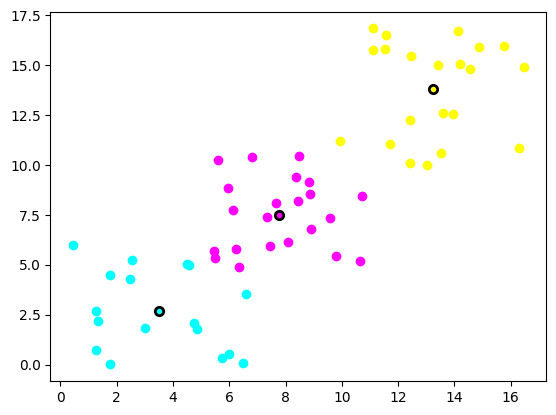

In [19]:

plt.figure()
# plt.scatter(loaded_points[:,0], loaded_points[:,1], color = 'black')

# for i in range (k): a loop would be great
plt.scatter(final[0][0,0],final[0][0,1], color ='magenta', edgecolor = 'black', linewidth = 2)
plt.scatter(final[0][1,0],final[0][1,1], color = 'cyan', edgecolor = 'black', linewidth = 2)
plt.scatter(final[0][2,0],final[0][2,1], color ='yellow', edgecolor = 'black', linewidth = 2)

new_assign = assign_centroids(compute_distances(loaded_points, final[0]))
print(new_assign)

plt.scatter(loaded_points[new_assign==0,0],loaded_points[new_assign==0,1], color ='magenta')
plt.scatter(loaded_points[new_assign==1,0],loaded_points[new_assign==1,1], color ='cyan')
plt.scatter(loaded_points[new_assign==2,0],loaded_points[new_assign==2,1], color ='yellow')


Evaluation methods - How to determine k?
One of the disadvantages of using k-means is that it requires a number of centroids k as an input, and it is not usually that obvious. Some methods exist to choose the correct number of centroids at the beginning. In this part of the lecture, we will describe two methods to select the right k value: Elbow method and Silhouette analysis

Elbow method
The Elbow Method is a technique used in determining the optimal number of clusters for k-means clustering. The basic idea is to plot the explained variation as a function of the number of clusters and pick the elbow of the curve as the number of clusters to use. In the picture below you can see that the best k value is 3

image.png image.png

The main advantage of this method that its very simple and easy to implement, on the other hand sometimes it is not very clear where the elbow is

Silhouette analysis
Silhouette analysis is a method to evaluate the quality of clustering results by measuring how similar each data point is to its own cluster compared to other clusters. A high silhouette score indicates that the data points in a cluster are well-separated from other clusters and that the clustering solution is good.

The silhouette score can be calculated using the following formula. This measure has a range of [-1, 1] and it is calculated for each sample in the dataset

image.png

where:

a_i represents the average distance of that point with all other points in the same clusters
b_i represents the average distance of that point with all the points in the closest cluster to its cluster
if

is 0 –> the sample is very close to the neighboring clusters.
is 1 –> the sample is far away from the neighboring clusters.
is -1 –> the sample is assigned to the wrong clusters.

ValueError: x and y must have same first dimension, but have shapes (8,) and (0,)

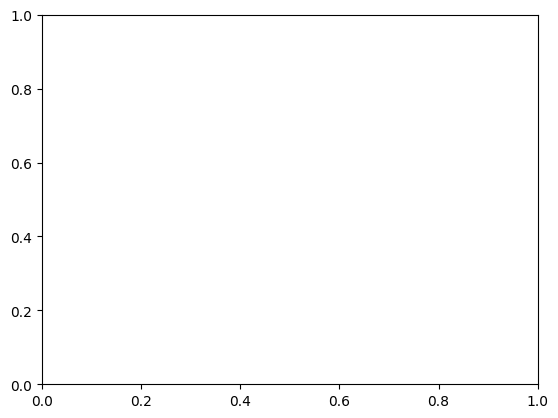

In [20]:
# Exercise 2 - Implementing an Elbow Method
# Implementing an elbow method is simple,

# 1. Create a vector of possible k values
# 2. Fit your data using different k values and save the objective function value
# 3. Plot objective function values in terms of k values
# 4. Find an elbow

k_all = range(2, 10)
all_objective = []


#WRITE YOUR CODE HERE
plt.figure()
plt.plot(k_all, all_objective)
plt.xlabel('K clusters')
plt.ylabel('Sum of squared distance')

In [ ]:
# Exercise 3 - Image Compression
# In this exercise, the task would be to implement simple image compression using the k-means algorithm. You can use an image in the directory Data\. This time, we will use a library that implements k-means for us - sklearn https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. To load the image you can use openCv or matplotlib (or anything else)

# Steps
# 1. Firstly reshape your image to 2D array with shape (image.width*image.height, n_of_colour_channels)
# 2. Initialize the K_means algorithm, where K would be equal to the number of colours in the compressed image
# 3. check cluster centroids and convert them to integers - these are your new colours (kmeans.cluster_centers_ could be useful)
# 4. replace your 2D array colors with newly generated colors
# 5. reshape your 2D array to the original image shape

# Tips:
# it takes a couple of seconds to compress the attached image. For debugging purposes, you can use a custom smaller image
# the implementation can be done in a single function

from matplotlib.image import imread
from sklearn.cluster import KMeans
import numpy as np


In [ ]:
# 1. load image

loaded_image = imread('/content/drive/MyDrive/Data/fish.jpg')

plt.imshow(loaded_image)
plt.show()

def compress_image(image: np.ndarray, number_of_colours: int) -> np.ndarray:
    """
    Compresses the given image by reducing the number of colours used in the image.

    This function applies k-means clustering to group the pixel colours of the image
    into 'number_of_colours' clusters. Each pixel's colour in the image is then replaced
    with the colour of the closest centroid of these clusters. This process effectively
    reduces the number of colours in the image, resulting in compression.

    Parameters:
    image (np.array): The original image is represented as a 3D numpy array
                      (height x width x color_channels).
    number_of_colours (int): The number of colours to reduce the image to.

    Returns:
    np.array: The compressed image as a numpy array in the same shape as the input.
    """

    return image

img = compress_image(loaded_image, 30)

plt.figure()
plt.imshow(img)
plt.show()